# Mall Customer Segmentation

*Organisations* often make use of segmentation techniques to discover groups of customers that have similiarities in purchases and expenditures. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Read input
df=pd.read_csv('../datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


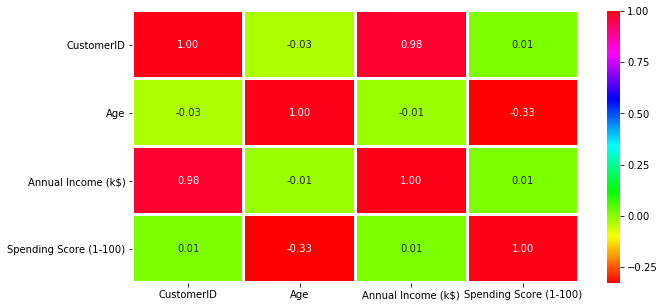

In [8]:
#Visualizing the correlation between predictors
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

In [7]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


## Visualization

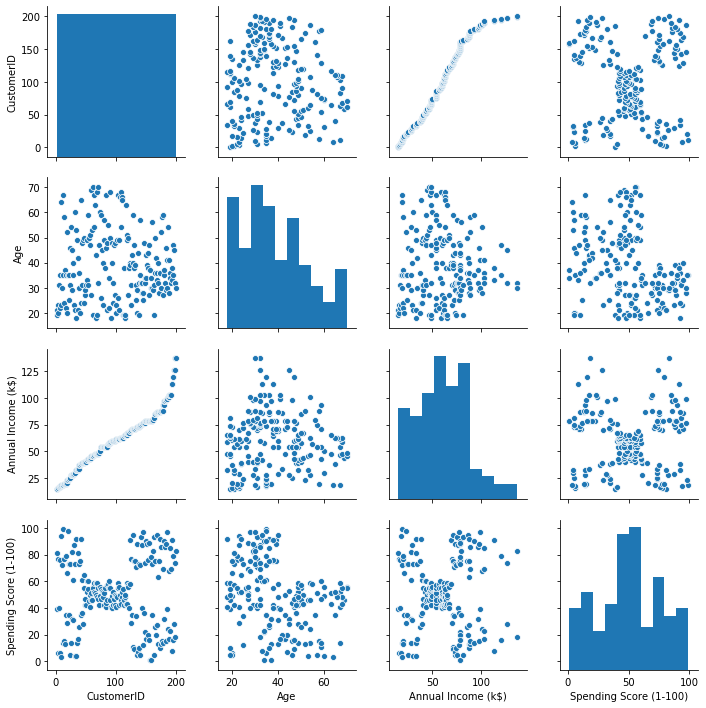

In [9]:
#Pairwise plot to get some idea about the relation between predictors
sns.pairplot(data=df)

As seen, Age and Annual Income plots are shifted to the left, indicating an increase in income with age only till a certain age before declining. Spending score is also higher among lower age groups.
The histograms indicate density/distribution of each predictor, and none of these seem to be normally distributed, however this might change with the number of bins.


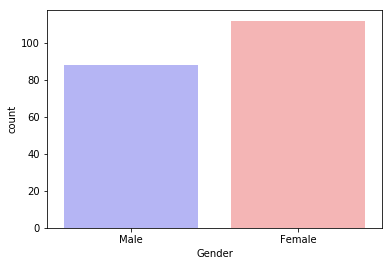

In [9]:
sns.countplot(x="Gender", data=df, palette="bwr")
plt.show()

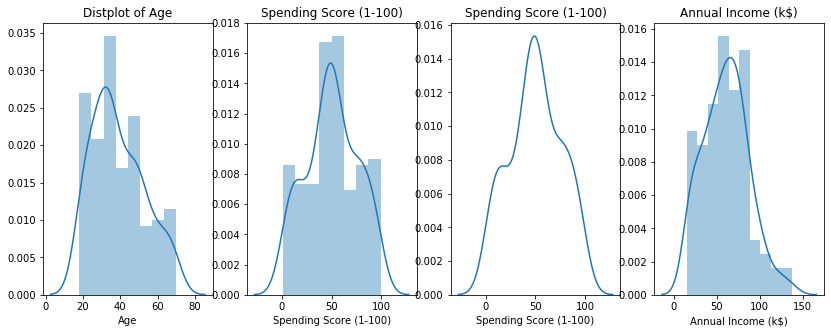

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1,4,1)
sns.distplot(df['Age'])
plt.title('Distplot of Age')
plt.subplot(1,4,2)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')
plt.subplot(1,4,3)
sns.distplot(df['Spending Score (1-100)'],hist=False)
plt.title('Spending Score (1-100)')
plt.subplot(1,4,4)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


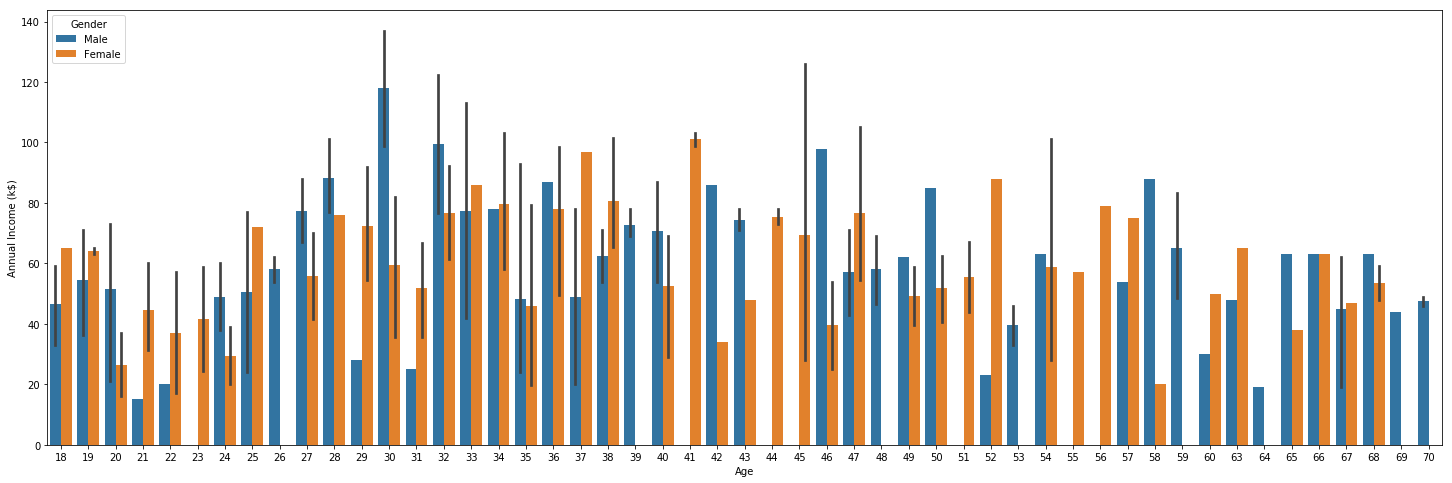

In [11]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)', x='Age',hue='Gender', data=df)
plt.show()

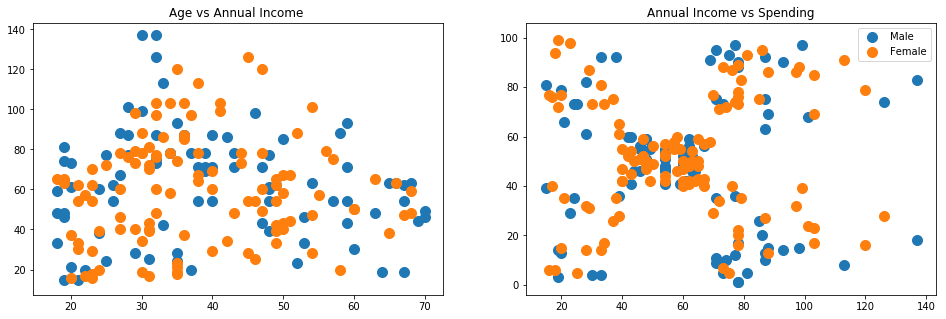

In [12]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = df[df['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

### Dendrogram Plot
A **dendrogram** is a diagram that shows the **hierarchical** relationship between objects. It is most commonly created as an output from **hierarchical clustering**. The main use of a dendrogram is to work out the best way to allocate objects to clusters. The dendrogram below shows the hierarchical clustering of six observations shown to on the scatterplot to the left. (Dendrogram is often miswritten as dendogram.)

**Hierarchical clustering** is where you build a cluster tree (a dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.
Each node in the cluster tree contains a group of similar data; Nodes group on the graph next to other, similar nodes. Clusters at one level join with clusters in the next level up, using a degree of similarity; The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set. The total number of clusters is not predetermined before you start the tree creation.

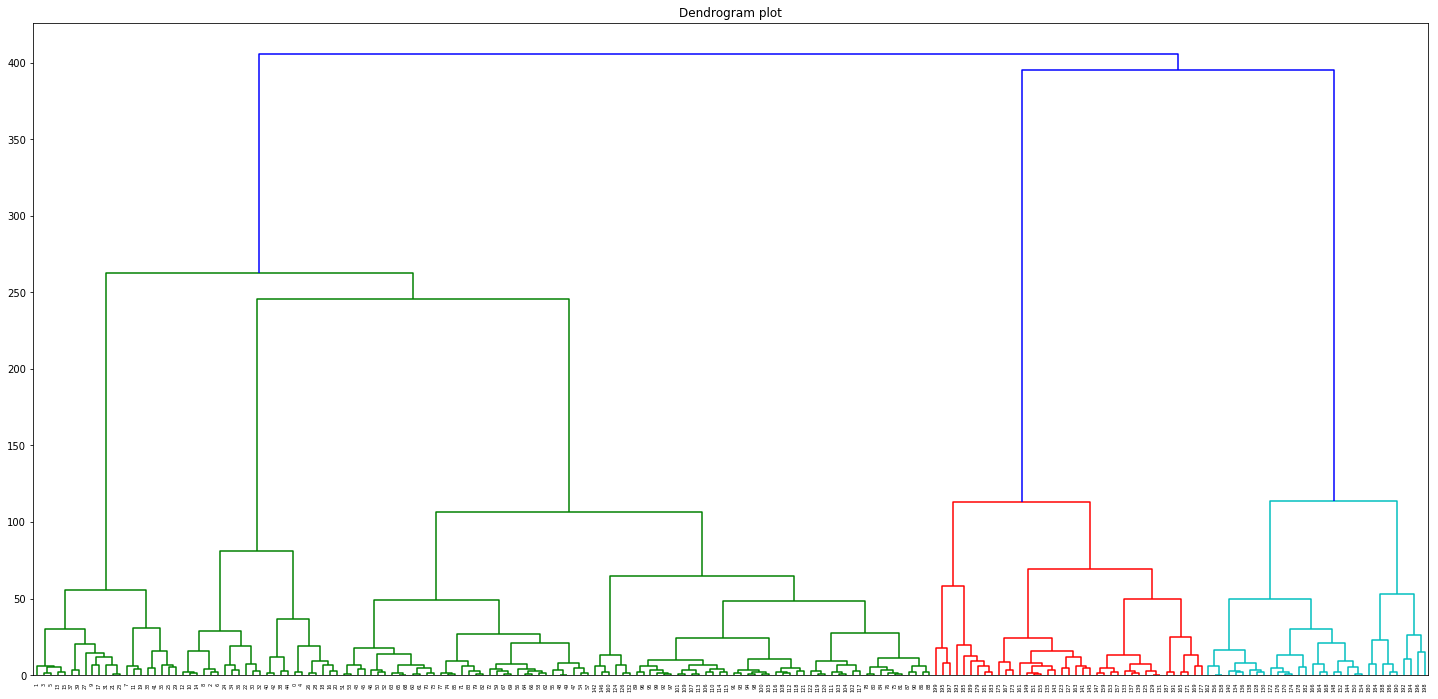

In [13]:
import scipy.cluster.hierarchy as sch
X=df.iloc[:, [3,4]].values
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()

As the dendrogram indicates, it might be ideal to have 5 clusters (horizontal line through 5 vertical lines -- 5 clusters)

# Introduction To K-Means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

Ideally, we want to minimise inertia and the number of clusters.
A plot of the number of clusters vs the inertia (within cluster sum of squares) gives a good idea about the choice of clusters.
An elbow point indicates a significant reduction in change of inertia with increase in clusters, so that can be a good number of clusters

Clusters of customers are made using their annual income (3rd column) and spending score (4th column)

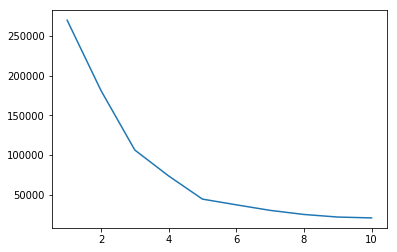

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show() 

As seen, 5 clusters is optimal

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

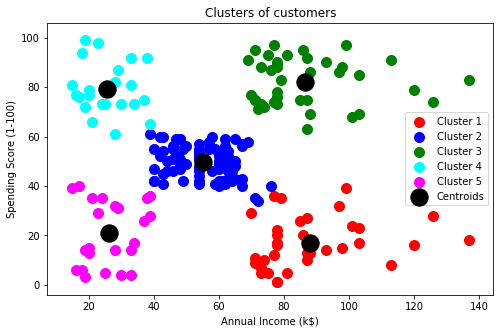

In [16]:
#Visualizing all the clusters 
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Advantages

1) Fast, robust and easier to understand.

2) Relatively efficient: O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t  is # iterations. Normally, k, t, d << n.

3) Gives best result when data set are distinct or well separated from each other.



## Benefits of customer segmentation

* By enabling companies to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities.
* When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs, it's easier for companies to send those customers special offers meant to encourage them to buy more products. Customer segmentation can also improve customer service and assist in customer loyalty and retention. 
* As a by-product of its personalized nature, marketing materials sent out using customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship.
* **>>** Other benefits of customer segmentation include staying a step ahead of competitors in specific sections of the market and identifying new products that existing or potential customers could be interested in or improving products to meet customer expectations.